# Business problem/question:
Which diabetes patients have higher readmission chances?

# Objective/proposed approach:
Modelling available historical medical datausing ML techniques to find the best model for readmission prediction 
and the factors which most likely affect the readmission

# Content:
1. Setting up and loading the data;
2. Preprocessing data for modelling;
3. Performing Exploratory Data Analysis (EDA) - i.e., exploring and preprocessing;
4. Model data using ML Models (Logistic regression, Decision Trees, Randon forrest, and AdaBoost Classifier); and
5. Summary



## 1. Setting up and loading the data

In [1]:
# Import libraries needed,
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode

# For exploring the categorical variables,
import seaborn as sns

# For plotting the numerical variables,
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
# Load the csv data using pandas and turn the data into a pd dataframe,
dataoriginal = pd.read_csv("diabetic_data.csv")
print(dataoriginal.shape)

## 2. Performing Exploratory Data Analysis (EDA) - i.e., exploring and preprocessing

### Explore the data

In [2]:
# Explore the data overview
print(dataoriginal.info())
print(dataoriginal.describe())


(101766, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient    

In [3]:
# Check first 5 records
dataoriginal.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Check and deal with missing values,
datacopy = dataoriginal.copy() 
Rep = datacopy.replace('?', np.NaN) 
nacheck = Rep.isnull().sum() 
nacheck


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
# From the above we can see that "Weight, payer_code, and medical_specialty" have a lot of missing values
# Thus it is best to remove these values from the dataset.

# Drop these columns,

datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)


In [6]:
datacopy['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
5         >30
6          NO
7         >30
8          NO
9          NO
10        >30
11        <30
12        <30
13         NO
14        >30
15         NO
16        <30
17         NO
18        >30
19         NO
20         NO
21         NO
22         NO
23        >30
24         NO
25         NO
26         NO
27        >30
28        >30
29        >30
         ... 
101736    >30
101737     NO
101738     NO
101739     NO
101740     NO
101741     NO
101742     NO
101743     NO
101744     NO
101745     NO
101746    <30
101747    >30
101748    >30
101749     NO
101750    <30
101751     NO
101752     NO
101753     NO
101754    >30
101755    >30
101756    >30
101757     NO
101758     NO
101759     NO
101760    >30
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [7]:
# We can see that there are three types of values:- 'NO','<30','>30'. 
# So, to make it a categorical variable so that different  
# ML techniques can be applies.

datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)


In [55]:
datacopy.groupby('30readmit').size()

30readmit
0    54864
1    46902
dtype: int64

In [8]:
# Remove pateints who are deceased from the dataset

datacopy = datacopy[((datacopy.discharge_disposition_id != 11) & 
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) & 
                                          (datacopy.discharge_disposition_id != 19) & 
                                          (datacopy.discharge_disposition_id != 20) & 
                                          (datacopy.discharge_disposition_id != 21))] 

In [9]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


C:\Users\quynhle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


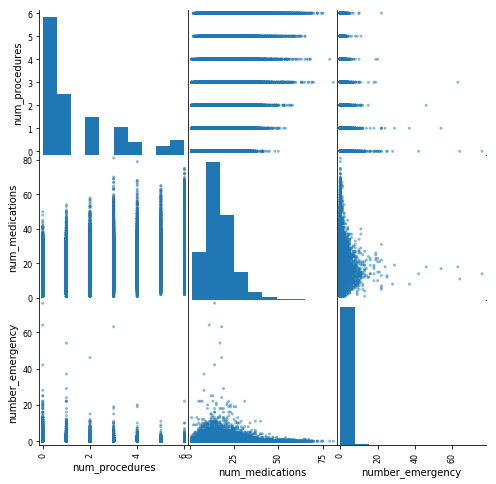

In [58]:
# Check the relationship between different variables to understand the data and if there is a strong correlation between 
# two variables then we can consider one of them.
import seaborn as sns
sm = pd.scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine() # to remove top and right axes

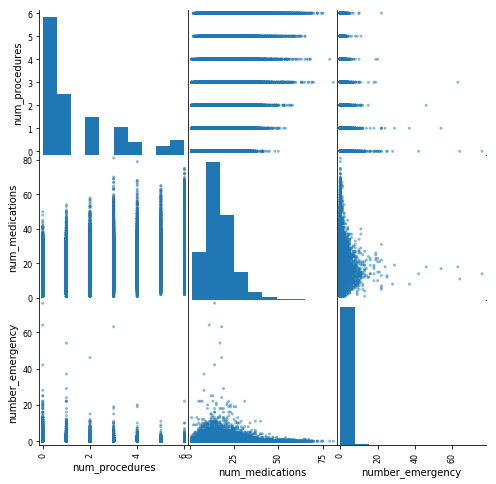

In [59]:
# As pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
sm = pd.plotting.scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()


From the above, we can see that there is no problem of multi-collinearity.
We can also see that as the number_emergency increases the num_medication decreases. 

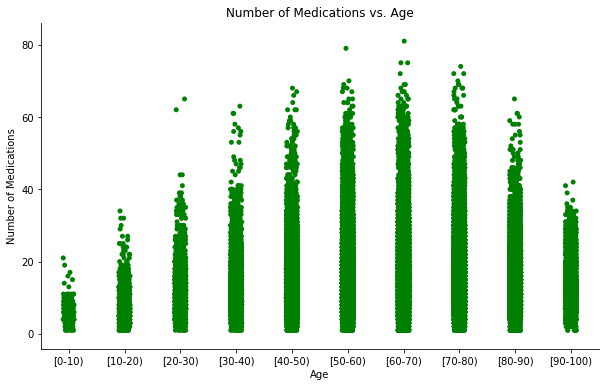

In [60]:
# See how the age and number of medicines vary,
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'green')
sns.despine() # to remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

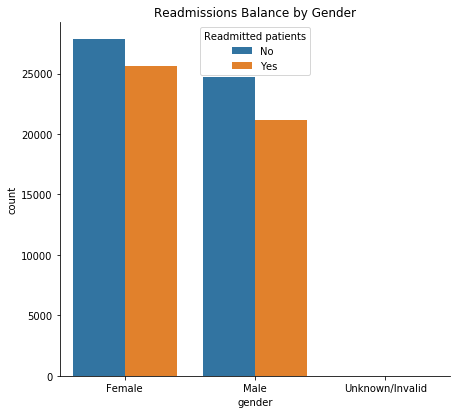

In [61]:
# Gender and Readmissions, hue is for setting color appearance parameters for '30readmit'
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = datacopy) 

sns.despine() # to remove top and right axes
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

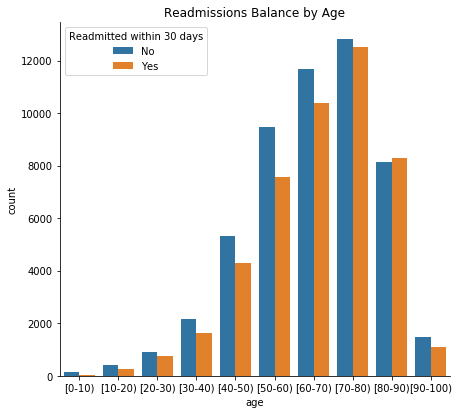

In [62]:
# Check the relation between age and readmission,

b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = datacopy, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

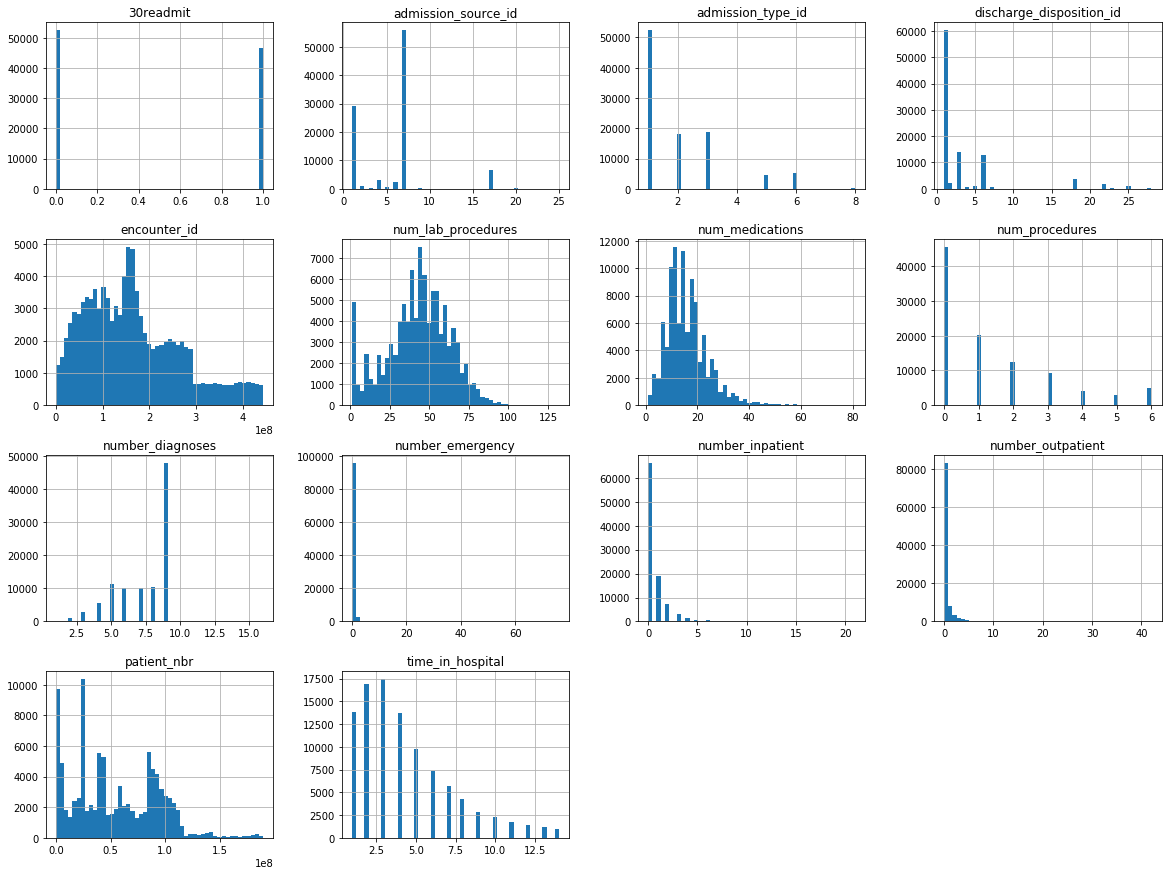

In [63]:
# Plot the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
datacopy.hist(bins=50, figsize=(20,15))
plt.show()

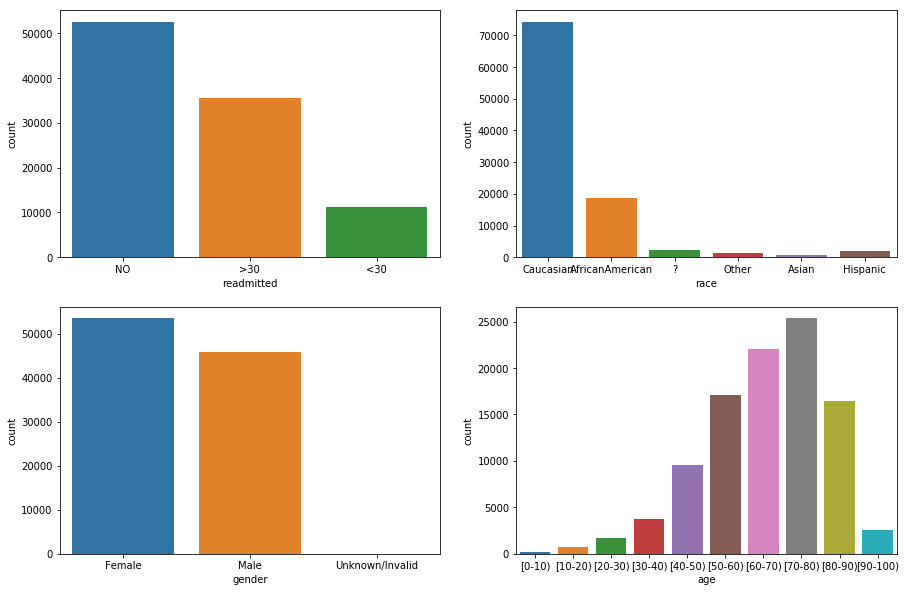

In [64]:
# Explore the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=datacopy, ax=ax[0][0])
sns.countplot(x="race", data=datacopy, ax=ax[0][1])
sns.countplot(x="gender", data=datacopy, ax=ax[1][0])
sns.countplot(x="age", data=datacopy, ax=ax[1][1])


Before applying logistic regression, we will have to make the data fit for performing logistic regression.


### Preprocess the data
To make the data fit for performing logistic regression model

In [65]:
# Clean the data, replace the null values in numeric data by 0 and object data by unknown,
numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [66]:
# Substitute 0 and unknown,
datacopy[numcolumn] = datacopy[numcolumn].fillna(0)
datacopy[objcolumn] = datacopy[objcolumn].fillna("unknown")


In [67]:
datacopy.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1


In [68]:
# Encode the data,
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
datacopy[listcol] = codemap(datacopy[listcol], codes)

In [69]:
# Review the dataset again and drop any irrelevant columns,
datacopy.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender       age  \
0            2278392      8222157        Caucasian  Female    [0-10)   
1             149190     55629189        Caucasian  Female   [10-20)   
2              64410     86047875  AfricanAmerican  Female   [20-30)   
3             500364     82442376        Caucasian    Male   [30-40)   
4              16680     42519267        Caucasian    Male   [40-50)   
5              35754     82637451        Caucasian    Male   [50-60)   
6              55842     84259809        Caucasian    Male   [60-70)   
7              63768    114882984        Caucasian    Male   [70-80)   
8              12522     48330783        Caucasian  Female   [80-90)   
9              15738     63555939        Caucasian  Female  [90-100)   
10             28236     89869032  AfricanAmerican  Female   [40-50)   
11             36900     77391171  AfricanAmerican    Male   [60-70)   
12             40926     85504

In [70]:
data1 = datacopy.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1)

In [71]:
data1.head(2)

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,1


In [72]:
# Normalize the data,
listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,6.894932e-17,-8.632969e-17,-4.756358e-17,1.773800e-17,-7.438515e-18,-5.650411e-17,-2.660700e-17,1.773800e-16,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


In [73]:
# Store readmitted in y and rest of the columns in X,
Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

In [74]:
# Split the data into training and vallidation data sets. 
# The training data will contain 80 % of the data and validation will contain remaining 20%
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [75]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


## 3. Model data using ML Models

### Logistic Regression

In [76]:
# Create a logistic regression model using Sklearn 
# See this link for tunning parameters of this model:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [77]:
# Checke the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6277115103930746


In [78]:
# Check the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8376 2130]
 [5267 4096]]


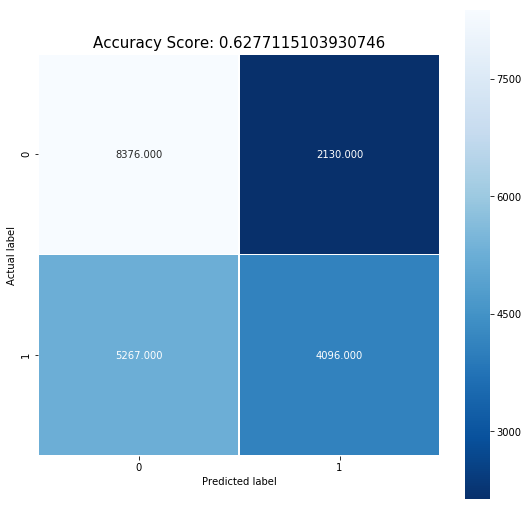

In [79]:
# Plot the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [80]:
# Check the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.80      0.69     10506
         YES       0.66      0.44      0.53      9363

   micro avg       0.63      0.63      0.63     19869
   macro avg       0.64      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [81]:
# Check the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

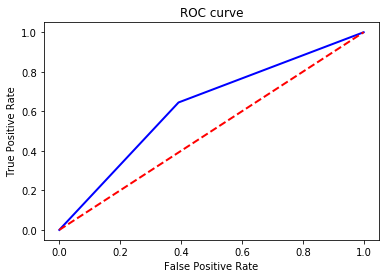

In [82]:
# Compute false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()

## Create the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')

## Find FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

## Specify the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Note:The performance of the logistic regression model is average, not too great. So, let's build other models.

### Random Forest Classifier

In [117]:
# Create a Random Forest Classifier model
# See this link for tunning parameters of this model:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [84]:
# Calculate the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [85]:
# Check the accuracy,
print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6363178821279379


In [86]:
# Print the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7554 2952]
 [4274 5089]]


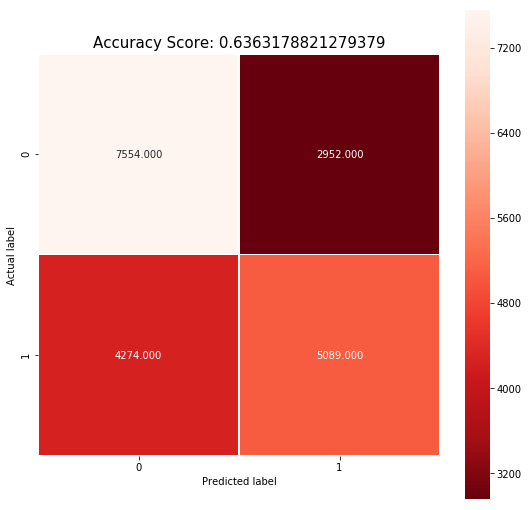

In [87]:
# Plot the confusion matrix,
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [88]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.64      0.72      0.68     10506
         YES       0.63      0.54      0.58      9363

   micro avg       0.64      0.64      0.64     19869
   macro avg       0.64      0.63      0.63     19869
weighted avg       0.64      0.64      0.63     19869



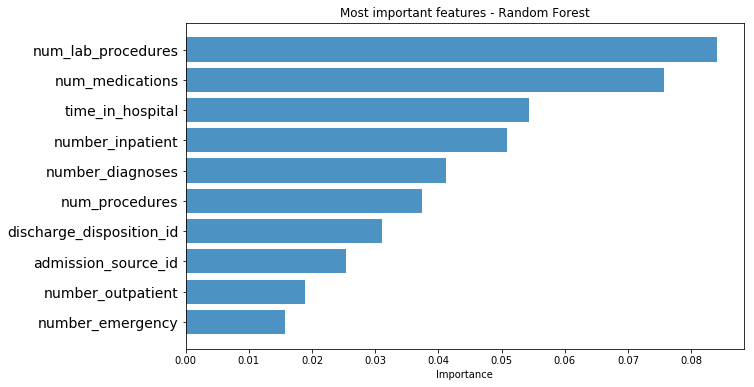

In [110]:
# Determine which features are most important,
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

### AdaBoosted Classification model

In [111]:
# Create a AdaBoosted Classification model
# See this link for tunning papametters of this model:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(Xtrain, Ytrain)
yadaclas = adaclass.predict(Xtest)

In [112]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6254466757260053


In [113]:
# Check the confusion matrix,
print(confusion_matrix(Ytest, yadaclas))

[[8328 2178]
 [5264 4099]]


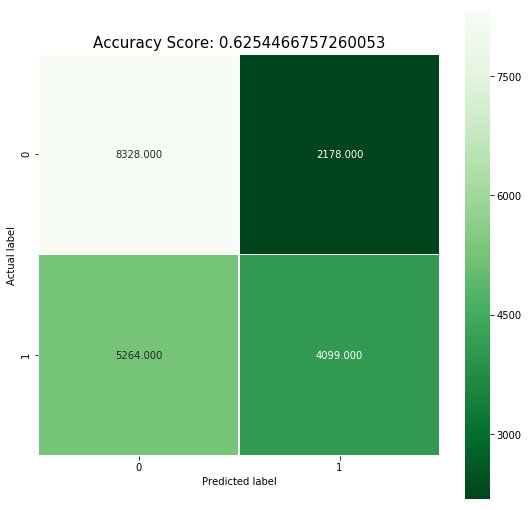

In [93]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [114]:
# Check recall, f1 :-
print(classification_report(Ytest, yadaclas, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.61      0.79      0.69     10506
         YES       0.65      0.44      0.52      9363

   micro avg       0.63      0.63      0.63     19869
   macro avg       0.63      0.62      0.61     19869
weighted avg       0.63      0.63      0.61     19869



In [95]:
# Calculate the False Positive and True Positive rate to get the ROC curve  
yadaclas = adaclass.decision_function(Xtest)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Ytest, yadaclas)

Note: Model's accuracy can be improved by tuning the model, so let's do that.

#### Hyperparameters Tunning for AdaBoosted

In [96]:
# Tune model's parameters
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
gridparam ={
        'n_estimators': [100, 200,500],
        'learning_rate': [0.2,0.5,1.0],
},
adagrid = GridSearchCV(ada_boost, cv=3, n_jobs=3, param_grid=gridparam)
adagrid.fit(Xtrain, Ytrain)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.2, n_estimators=20, random_state=123),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid=({'n_estimators': [100, 200, 500], 'learning_rate': [0.2, 0.5, 1.0]},),
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
# The accuracy of the model with the best parameters
adagrid.score(Xtest, Ytest)

0.6380794202023252

In [98]:
gridyada = adagrid.predict(Xtest)
print(classification_report(Ytest, gridyada, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.63      0.76      0.69     10506
         YES       0.65      0.50      0.57      9363

   micro avg       0.64      0.64      0.64     19869
   macro avg       0.64      0.63      0.63     19869
weighted avg       0.64      0.64      0.63     19869



In [99]:
ygridadascore = adagrid.decision_function(Xtest)
fpr_adamod, tpr_adamod, thresholds_grid_ada = roc_curve(Ytest, ygridadascore)

### Decision tree

In [102]:
# As sklearn.cross_validation is depreciated, repalce it with sklearn.model_selection
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [103]:
# Create Decision Tree Classifier model
# See this link for tunning papametters of this model:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clfgini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clfgini.fit(Xtrain, Ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [104]:
ypreddt = clfgini.predict(Xtest)
ypreddt

array([1, 1, 0, ..., 1, 0, 1])

In [105]:
print( "Accuracy is ", accuracy_score(Ytest,ypreddt)*100)

Accuracy is  62.358447833308176


### Comparing the models

In [106]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre) #logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest) #random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Ytest, yadaclas) #Ada boost classifier
fpr_adamod, tpr_adamod, thresholds = roc_curve(Ytest,ygridadascore ) #Hyperparameters Tunning for AdaBoosted
fpr_dt, tpr_dt, thresholds = roc_curve(Ytest,ypreddt )

C:\Users\quynhle\AppData\Local\Continuum\anaconda3\envs\Test\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'True Positive Rate')

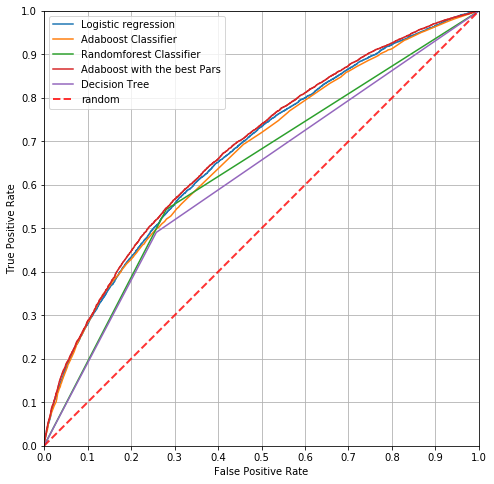

In [107]:
# Compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot(fpr_adamod, tpr_adamod, label='Adaboost with the best Pars')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [119]:
print("Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest)*100)
print("Accuracy of Hyperparameter Tuning AdaBoosted Classification model: ", adagrid.score(Xtest, Ytest)*100)
print("Accuracy of Decision Tree ", accuracy_score(Ytest,ypreddt)*100)

Accuracy of Logistic regression model: 62.77115103930746
Accuracy of Random forest classification:  63.63178821279379
Accuracy of AdaBoosted Classification model:  62.54466757260053
Accuracy of Hyperparameter Tuning AdaBoosted Classification model:  63.807942020232524
Accuracy of Decision Tree  62.358447833308176


## Summary

1. From the above we can see that the accuracy levels of AdaBoost after tuning and Random forest is among the best, about 64%.
2. The accuracy of all the models are similar and ranges between 62-64%. Further, applying more pre-processing techniques
   might help. The dataset needs more data cleaning and data fitting to achieve a higher degree of accuracy.
3. Looking at the false positives and the recall value which is approx 60% in Random forest, it gives us better results than        the rest.
4. The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different        models.

# Claims: 
Reviewed and improved codes originally from https://github.com/AkankshaUtreja/Diabetic-Patients-Readmission-Prediction.git